In [266]:
import pandas as pd
import numpy as np

In [357]:
import seaborn as sns

### Нахождение параметров уравнения без библиотек

In [267]:
data = pd.read_csv('techparams_train.csv', sep=',')

In [268]:
data['0'] = [1] * data.shape[0]

In [269]:
col = ['0'] + list(data.columns[:-2])

In [270]:
my_y = np.array(data['target'].copy())
my_x = np.array(data[col].copy())

In [271]:
def modeler(x, y):
    b = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)    # свободный член + коэффициенты
    return b

In [272]:
print(modeler(x=my_x, y=my_y))

[-3.36061812e+03  5.26590957e-05  3.70595100e-01  6.09426977e+00
  1.49500526e-03 -3.68457021e+00 -7.67701350e-01 -8.05055653e-01
  8.80558233e+01 -8.29569124e+00  2.77527697e+00 -1.69151867e-02
 -4.55704573e+01  3.47657410e+01  4.13473135e-04 -2.05829977e-01
  5.10659783e-01  2.06987214e+00  1.46588396e-02  1.38751825e+00
  2.97202648e-02 -1.58400574e-03 -4.66697920e-02  6.95151048e+00
 -1.31212239e+01  1.16238892e+01  2.21866776e+00 -1.09643185e-02
  1.38569380e+00 -7.31450562e+00  2.06647584e+02 -4.55192618e-02]


In [273]:
# сравним с тем, что дает библиотеки:
from sklearn.linear_model import LinearRegression

In [274]:
xx = np.array(data[col[1:]].copy())
model = LinearRegression().fit(xx, my_y)
print(model.intercept_, model.coef_)

-3360.6181225878136 [ 5.26590957e-05  3.70595101e-01  6.09426977e+00  1.49500526e-03
 -3.68457021e+00 -7.67701350e-01 -8.05055652e-01  8.80558233e+01
 -8.29569124e+00  2.77527697e+00 -1.69151867e-02 -4.55704573e+01
  3.47657410e+01  4.13473135e-04 -2.05829977e-01  5.10659783e-01
  2.06987214e+00  1.46588396e-02  1.38751825e+00  2.97202648e-02
 -1.58400574e-03 -4.66697920e-02  6.95151048e+00 -1.31212239e+01
  1.16238892e+01  2.21866776e+00 -1.09643185e-02  1.38569380e+00
 -7.31450562e+00  2.06647584e+02 -4.55192618e-02]


Результаты одинаковы

### Градиентный спуск

In [275]:
from random import *

In [276]:
from sympy import *

In [381]:
y = np.random.normal(size=30).reshape(30, 1)
x = np.ones(30).reshape(30, 1)
xx = np.array(range(1, 31)).reshape(30, 1)
x = np.concatenate((x, xx), axis=1)

In [382]:
print(modeler(x=x, y=y))

[[ 0.37730483]
 [-0.00766509]]


In [383]:
m = LinearRegression().fit(xx, y)
print(m.intercept_, m.coef_)

[0.37730483] [[-0.00766509]]


In [384]:
f, w0, w1 = symbols('f w0 w1')

In [385]:
f = sum((y - (w0 + w1 * xx)) ** 2)[0]

In [386]:
d_w0 = diff(f, w0)
d_w1 = diff(f, w1)

In [387]:
d_w0

60*w0 + 930*w1 - 15.5097582888068

In [388]:
d_w1

930*w0 + 18910*w1 - 205.946683507059

In [389]:
sol = np.array(solve(d_w0))
b = np.array(solve(d_w1.subs(w0, sol[0][w0])))[0]
a = np.array(solve(d_w1.subs(w1, b)))[0]

In [390]:
print(a, b)

0.377304833443723 -0.00766508786861996


In [391]:
a_0 = 0
b_0 = 0
a_1 = 5
b_1 = 5

In [392]:
while ((a_0 - a_1) ** 2 + (b_0 - b_1) ** 2) ** 0.5 > 0.0000001:
    a_0 = a_1
    b_0 = b_1
    a_1 = a_0 - lam * d_w0.subs(w0, a_0).subs(w1, b_0)
    b_1 = b_0 - lam * d_w1.subs(w1, b_0).subs(w0, a_0)

In [393]:
a_1

0.377374878842927

In [394]:
b_1

-0.00766853531817452

In [396]:
y_pred = (a_1 + b_1 * xx).reshape(1, 30)[0].astype('float')

<AxesSubplot:>

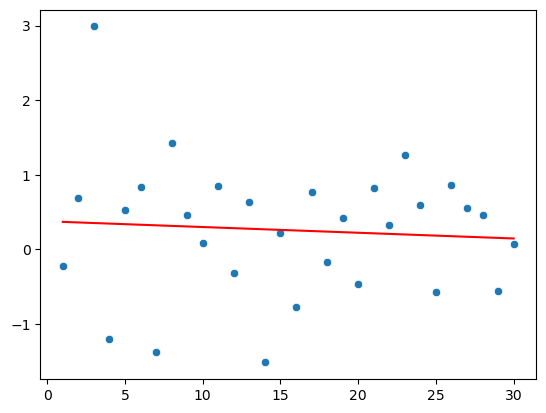

In [398]:
sns.scatterplot(x=xx.reshape(1, 30)[0], y=y.reshape(1, 30)[0])
sns.lineplot(x=xx.reshape(1, 30)[0], y=y_pred, color='r')

### Стохастический градиентный спуск

In [399]:
ff = symbols('ff')

In [416]:
i = np.random.randint(0, 31)
i

19

In [417]:
ff = (y[i][0] - (w0 + w1 * xx[i][0])) ** 2

In [418]:
ff

400*(-w0/20 - w1 - 0.0230259533173241)**2

In [419]:
d_w0 = diff(ff, w0)
d_w1 = diff(ff, w1)

In [420]:
d_w0

2*w0 + 40*w1 + 0.921038132692963

In [421]:
d_w1

40*w0 + 800*w1 + 18.4207626538593

In [422]:
a_0 = 0
b_0 = 0
a_1 = 5
b_1 = 5

In [423]:
while ((a_0 - a_1) ** 2 + (b_0 - b_1) ** 2) ** 0.5 > 0.0000001:
    a_0 = a_1
    b_0 = b_1
    a_1 = a_0 - lam * d_w0.subs(w0, a_0).subs(w1, b_0)
    b_1 = b_0 - lam * d_w1.subs(w1, b_0).subs(w0, a_0)

In [424]:
a_1

4.73700624176188

In [425]:
b_1

-0.259875164762426

In [426]:
y_pred = (a_1 + b_1 * xx).reshape(1, 30)[0].astype('float')

<AxesSubplot:>

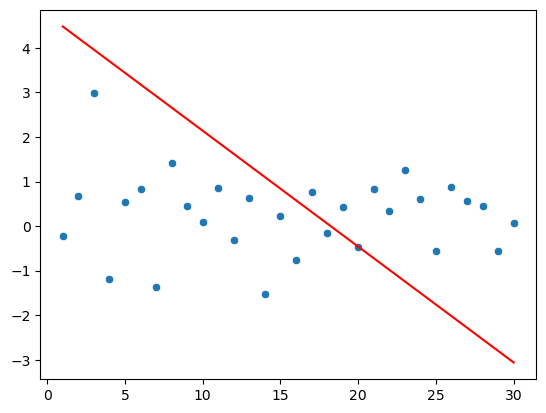

In [427]:
sns.scatterplot(x=xx.reshape(1, 30)[0], y=y.reshape(1, 30)[0])
sns.lineplot(x=xx.reshape(1, 30)[0], y=y_pred, color='r')